<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-анализ-данных" data-toc-modified-id="Загрузка-данных-и-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и анализ данных</a></span><ul class="toc-item"><li><span><a href="#вывод" data-toc-modified-id="вывод-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#вывод" data-toc-modified-id="вывод-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>вывод</a></span></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#ЛОгистическая-регрессия" data-toc-modified-id="ЛОгистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ЛОгистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#результат" data-toc-modified-id="результат-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>результат</a></span></li></ul></li><li><span><a href="#LGBM-классификатор" data-toc-modified-id="LGBM-классификатор-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LGBM классификатор</a></span><ul class="toc-item"><li><span><a href="#результат" data-toc-modified-id="результат-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>результат</a></span></li></ul></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#результат" data-toc-modified-id="результат-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>результат</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка данных и анализ данных

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'));

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
try:
    
    data = pd.read_csv('C:\\Users\\magas\\Desktop\\Проекты\\toxic_comments.csv')
    
except:
    
    data = pd.read_csv('/datasets/toxic_comments.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [5]:
data.head(30)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


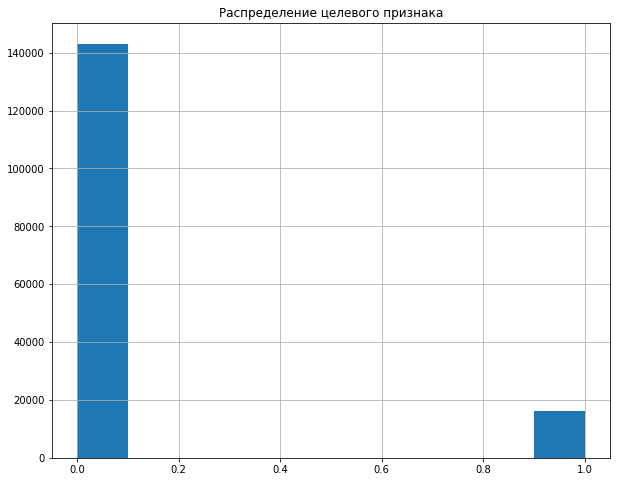

In [6]:
plt.figure(figsize=(10, 8))
data['toxic'].hist()
plt.title('Распределение целевого признака');

In [7]:
data.duplicated().sum()

0

#### вывод

Сразу бросается в глаза столбец `Unnamed`, не несущий никакого смысла - удаляем.

ПРи этом, данные в хорошем состоянии: дубликатов и пропусков нет.
есть лишь дисбаланс классов, попробуем применить downsampled и upsample на тренировочной выборке и посмотрим на результат

### Подготовка данных. 

In [8]:
# удалим ненужный столбец
data = data.drop('Unnamed: 0', axis=1)


In [9]:
# Разделим на выборки

train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['toxic'])

features_train = train.drop(['toxic'], axis=1)
target_train = train['toxic']

features_test = test.drop(['toxic'], axis=1)
target_test = test['toxic']

In [10]:
# функция очистки 

def clear_text(text):
    return ' '.join(re.sub(r'[^а-яА-ЯёЁa-zA-Z]', ' ',text.lower()) .split())

In [11]:
# Лемматизация

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

def lemmatization(text):
    word_list = nltk.word_tokenize(text)
    tagged_words = pos_tag(word_list)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_words]
    return ' '.join(lemmatized_words)

In [13]:
# обработаем выборки

features_train['text'] = features_train['text'].progress_apply(clear_text)
features_test['text'] = features_test['text'].progress_apply(clear_text)

features_train['text'] = features_train['text'].progress_apply(lemmatization)
features_test['text'] = features_test['text'].progress_apply(lemmatization)

  0%|          | 0/127433 [00:00<?, ?it/s]

  0%|          | 0/31859 [00:00<?, ?it/s]

  0%|          | 0/127433 [00:00<?, ?it/s]

  0%|          | 0/31859 [00:00<?, ?it/s]

In [14]:
# инициация векторизотара и подготовка моделей

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1))
logistic_regression = LogisticRegression(random_state=42)
lgbm_classifier = LGBMClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [15]:
# векторизация

features_train_transformed = tfidf_vectorizer.fit_transform(features_train['text'])
features_test_transformed = tfidf_vectorizer.transform(features_test['text'])

#### вывод

выборки созданы и обработаны

### Итог

В этом разделе были выполнены следующие шаги:

- Загрузка и анализ данных:

- Обработка:

    - удалили ненужный столбец
    - разделили датасет на выборки
    - Провели преобразование: очистка от лишних знаков, стоп-слов, лемматизация и векторизация
    
Все готово для обучения и прогнозирования
    

## Обучение

Обучать будем 3 модели:
- Логистическая регрессия
- LGBMClassifer
- Случайный лес

для подбора параметров будем использовать кросс-валидацию

### ЛОгистическая регрессия

In [25]:
# установим параметры для линейной регрессии

c_values = list(range(5, 16, 1))

param_grid = {
    'C': c_values,           
    'penalty': ['l1', 'l2'],         
    'solver': ['liblinear'],
    'class_weight':['balanced']
}

In [26]:
# Обучим модель и найдем параметры

lr_grid_search = GridSearchCV(logistic_regression, 
                                    param_grid,
                                    cv=3, 
                                    scoring='f1',
                                    verbose = 10,
                                    n_jobs=-1)

lr_grid_search.fit(features_train_transformed, target_train)


best_params = lr_grid_search.best_params_
best_score = lr_grid_search.best_score_


print("Лучшие параметры:", best_params)
print("Лучшее значение F1-score:", best_score)

Fitting 3 folds for each of 22 candidates, totalling 66 fits
[CV 1/3; 1/22] START C=5, class_weight=balanced, penalty=l1, solver=liblinear...
[CV 1/3; 1/22] END C=5, class_weight=balanced, penalty=l1, solver=liblinear; total time=   2.1s
[CV 2/3; 1/22] START C=5, class_weight=balanced, penalty=l1, solver=liblinear...
[CV 2/3; 1/22] END C=5, class_weight=balanced, penalty=l1, solver=liblinear; total time=   2.2s
[CV 3/3; 1/22] START C=5, class_weight=balanced, penalty=l1, solver=liblinear...
[CV 3/3; 1/22] END C=5, class_weight=balanced, penalty=l1, solver=liblinear; total time=   1.8s
[CV 1/3; 2/22] START C=5, class_weight=balanced, penalty=l2, solver=liblinear...
[CV 1/3; 2/22] END C=5, class_weight=balanced, penalty=l2, solver=liblinear; total time=  19.4s
[CV 2/3; 2/22] START C=5, class_weight=balanced, penalty=l2, solver=liblinear...
[CV 2/3; 2/22] END C=5, class_weight=balanced, penalty=l2, solver=liblinear; total time=  20.6s
[CV 3/3; 2/22] START C=5, class_weight=balanced, penal

#### результат

На трейне прошли порог, посмотрим на результаты других моделей

### LGBM классификатор

In [27]:
# установим параметры для LGBM классификатора

n_estimators_values = list(range(50, 151, 50))

max_depth_values = list(range(1, 11))

param_grid = {
    'n_estimators': n_estimators_values,
    'max_depth': max_depth_values,
    'class_weight':['balanced']
    
}

In [28]:
# Обучим модель и найдем параметры

lgbm_grid_search = GridSearchCV(LGBMClassifier(random_state=42, learning_rate=0.1), 
                                param_grid, 
                                cv=3, 
                                scoring='f1',
                                verbose = 10,
                                n_jobs=-1)


lgbm_grid_search.fit(features_train_transformed, target_train)


best_params = lgbm_grid_search.best_params_
best_score = lgbm_grid_search.best_score_


print("Лучшие параметры для LGBMClassifier:", best_params)
print("Лучшее значение F1-score для LGBMClassifier:", best_score)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START class_weight=balanced, max_depth=1, n_estimators=50........
[CV 1/3; 1/30] END class_weight=balanced, max_depth=1, n_estimators=50; total time=  49.3s
[CV 2/3; 1/30] START class_weight=balanced, max_depth=1, n_estimators=50........
[CV 2/3; 1/30] END class_weight=balanced, max_depth=1, n_estimators=50; total time=  39.0s
[CV 3/3; 1/30] START class_weight=balanced, max_depth=1, n_estimators=50........
[CV 3/3; 1/30] END class_weight=balanced, max_depth=1, n_estimators=50; total time=  38.0s
[CV 1/3; 2/30] START class_weight=balanced, max_depth=1, n_estimators=100.......
[CV 1/3; 2/30] END class_weight=balanced, max_depth=1, n_estimators=100; total time=  57.5s
[CV 2/3; 2/30] START class_weight=balanced, max_depth=1, n_estimators=100.......
[CV 2/3; 2/30] END class_weight=balanced, max_depth=1, n_estimators=100; total time=  42.0s
[CV 3/3; 2/30] START class_weight=balanced, max_depth=1, n_estimators=100....

#### результат

Недостаточный результат

### Случайный лес

In [29]:
# установим параметры для LGBM классификатора

n_estimators_values = list(range(50, 151, 50))

max_depth_values = list(range(1, 11))

param_grid = {
    'n_estimators': n_estimators_values,
    'max_depth': max_depth_values,
    'class_weight':['balanced']
}

In [30]:
# Обучим модель и найдем параметры

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grid, 
                              cv=3, 
                              scoring='f1',
                              verbose = 10,
                              n_jobs=-1)

rf_grid_search.fit(features_train_transformed, target_train)


best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_


print("Лучшие параметры для RandomForestClassifier:", best_params)
print("Лучшее значение F1-score для RandomForestClassifier:", best_score)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START class_weight=balanced, max_depth=1, n_estimators=50........
[CV 1/3; 1/30] END class_weight=balanced, max_depth=1, n_estimators=50; total time=   2.1s
[CV 2/3; 1/30] START class_weight=balanced, max_depth=1, n_estimators=50........
[CV 2/3; 1/30] END class_weight=balanced, max_depth=1, n_estimators=50; total time=   2.1s
[CV 3/3; 1/30] START class_weight=balanced, max_depth=1, n_estimators=50........
[CV 3/3; 1/30] END class_weight=balanced, max_depth=1, n_estimators=50; total time=   2.2s
[CV 1/3; 2/30] START class_weight=balanced, max_depth=1, n_estimators=100.......
[CV 1/3; 2/30] END class_weight=balanced, max_depth=1, n_estimators=100; total time=   3.4s
[CV 2/3; 2/30] START class_weight=balanced, max_depth=1, n_estimators=100.......
[CV 2/3; 2/30] END class_weight=balanced, max_depth=1, n_estimators=100; total time=   3.4s
[CV 3/3; 2/30] START class_weight=balanced, max_depth=1, n_estimators=100....

#### результат

Плохой результат

### Вывод

С рещультатом 7620714460815878 лучшей оказаласьмодель Логистической регрессии. ЕЕ и будем тестировать

## Тестирование

In [3]:
# получим лучшую модель из GridSearchCV

lr_model = lr_grid_search.best_estimator_

NameError: name 'lr_grid_search' is not defined

In [ ]:
test_prediction = lr_model.predict(features_test_transformed)

f1=f1_score(target_test,test_prediction)

print("Значение F1 на тесте:", f1)

Рузультат F1 - 0.7598215570585696 - порог пройден



## Выводы

В ходе проекта были выполнены следующие шаги:

- Загрузка и анализ данных:

    - Загрузили библиотеки и модули
    - Загрузили данные и оценили их состояние

- Обработка:

    - Удалили ненужный столбец
    - Разделили датасет на выборки
    - Провели преобразование: очистка от лишних знаков, стоп-слов, лемматизация и векторизация

- Обучение и тестирование:

    -Подготовили 3 модели
        - Логистическая регрессия
        - LGBMClassifer
        - Случайный лес
    - Использовали кросс-валидацию 
    - Данные не балансировали - результат и без нее удовлетворительный. Пробовал pipeline с методами SMOTE и RandomOverSampler - результат такой же, но дольше обучается и предсказывает. 
    
**Результаты**

- ЛОгистическая регрессия на трейне: 0.7620714460815878
- LGBMClassifier на трейне: 0.7370037855068583
- Случайный лес на тесте: 0.36315631466125015

- ЛОгистическая реегрессия на тесте: 0.7598215570585696


ЛОгистическая регрессия показала наилучший результат, перевалив за указанный порог и на тренировке, и в тесте, при этом оба результата почти одинаковые, что говорит о том, что модель не переучена и работает хорошо.  